In [1]:
import os
files = [f for f in os.listdir('messages')]
print(len(files))

1090


In [2]:
words_set = set()

In [3]:
def get_words(file):
    reader = open(file, 'r')
    res = []
    for line in reader.readlines():
        for word in line.split():
            if word != 'Subject:':
                res.append(word)
    return res

def get_lines(file):
    reader = open(file, 'r')
    return reader.readlines()

def get_words_in_lines(file):
    lines = get_lines(file)
    res = []
    for line in lines:
        words = []
        for word in line.split():
            words.append(word)
        res.append(words)
    return res

def add_words(file):
    for word in get_words(file):
        words_set.add(int(word))

In [4]:
for file in files:
    add_words('messages/' + file)

In [5]:
print(len(words_set))

24728


In [6]:
print(min(words_set))

0


In [7]:
print(max(words_set))

24747


In [8]:
n = max(words_set) + 1
m = len(files)
k = int(m * 0.8)

In [9]:
def words_count(file):
    res = [0 for _ in range(n)]
    for word in get_words(file):
        res[int(word)] = 1
    return res

def count_words_in_lines(file):
    lines = get_words_in_lines(file)
    res = []
    for line in lines:
        count = [0 for _ in range(n)]
        for word in line:
            if word != 'Subject:':
                count[int(word)] += 1
        res.append(count)
    return res

In [10]:
def is_legit(filename):
    return 'legit' in filename

In [11]:
row1 = []
column1 = []
values1 = []

row2 = []
column2 = []
values2 = []

y1 = []
y2 = []

In [12]:
i = 0

for file in files:
    counts = words_count('messages/' + file)
    for j in range(n):
        if counts[j] > 0:
            if i < k:
                row1.append(i)
                column1.append(j)
                values1.append(counts[j])
            else:
                row2.append(i - k)
                column2.append(j)
                values2.append(counts[j])
    y = 0
    if is_legit(file):
        y = 1
    if i < k:
        y1.append(y)
    else:
        y2.append(y)
    i += 1

# for file in files:
#     counts = count_words_in_lines('messages/' + file)
#     for l in range(2):
#         for j in range(n):
#             if counts[l][j] > 0:
#                 if i < k:
#                     row1.append(i)
#                     column1.append(l * n + j)
#                     values1.append(counts[l][j])
#                 else:
#                     row2.append(i - k)
#                     column2.append(l * n + j)
#                     values2.append(counts[l][j])
#     y = 0
#     if is_legit(file):
#         y = 1
#     if i < k:
#         y1.append(y)
#     else:
#         y2.append(y)
#     i += 1

print(len(row1))
print(len(row2))

197085
50173


In [13]:
import numpy as np

from scipy.sparse import csr_matrix

In [14]:
train = csr_matrix((np.array(values1), (np.array(row1), np.array(column1))))
test = csr_matrix((np.array(values2), (np.array(row2), np.array(column2))))
print(train.shape)
print(test.shape)

(872, 24748)
(218, 24748)


In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
model = MultinomialNB()
#model = MultinomialNB(class_prior=[0.000000000000000001, 1000000000000000000])

In [17]:
model.fit(train, y1)

MultinomialNB()

In [18]:
predictions = model.predict(test)

In [19]:
print(y2)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0]


In [20]:
predictions_list = predictions.tolist()
print(predictions_list)
print(len(predictions_list))

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0]
218


In [21]:
cnt = 0

for i in range(len(y2)):
    if y2[i] != predictions_list[i]:
        cnt += 1

print(cnt)

6


In [22]:
results = [[0 for i in range(2)] for j in range(2)]

In [23]:
for i in range(len(y2)):
    results[y2[i]][predictions_list[i]] += 1

In [24]:
print(results)

[[96, 0], [6, 116]]


In [33]:
from sklearn import metrics
scores = list(map(lambda x: x[1], model.predict_proba(test)))
# print(predictions)
# print(y2)
# print(scores)
fpr, tpr, _ = metrics.roc_curve(y2, scores)

[1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1
 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1
 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1
 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0]
[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1

In [26]:
import matplotlib.pyplot as plt

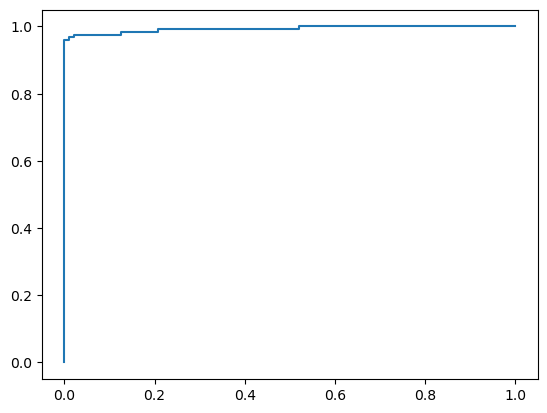

In [27]:
plt.plot(fpr,tpr)
plt.show()

In [34]:
# auc = metrics.roc_auc_score(y2, predictions)
auc = metrics.roc_auc_score(y2, scores)
# scores

In [35]:
auc

0.9927424863387978

In [30]:
# += 1 column 0.9383764480445954
# = 1 column 0.9728682170542635
# = 2 columns 0.8657346920999912
# += 2 columns 0.867476700635833

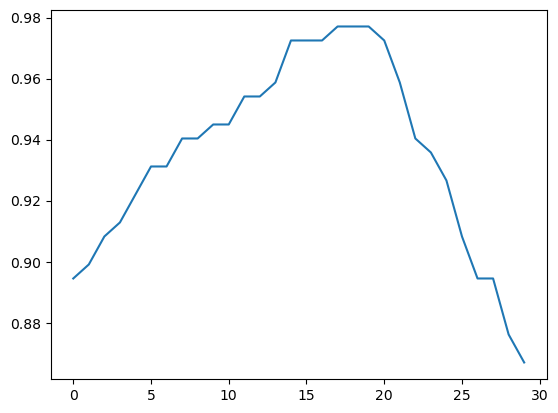

In [31]:
accuracy = []

for i in range(-15, 15):
    p = 10 ** i
    model = MultinomialNB(class_prior=[1, p])
    model.fit(train, y1)
    predictions = model.predict(test)
    cnt = 0
    for i in range(len(y2)):
        if y2[i] == predictions[i]:
            cnt += 1
    cnt /= len(y2)
    accuracy.append(cnt)

plt.plot(accuracy)